In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import combinations

plt.style.use('ggplot')

data = pd.read_csv("data/01_clean/stocks.csv")
data_total_return = pd.read_csv("data/01_clean/total_return_var.csv")
tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA']

In [ ]:

def moving_average(data, stock, n_days):
    return data[f'{stock}_close'].rolling(window=n_days).mean()

def stock_volume(data, stock):
    return data[f'{stock}_volume']

def stock_split(data, stock):
    return data[f'{stock}_split']

In [3]:
data.head()

,Unnamed: 0,ABEV3.SA_open,ABEV3.SA_high,ABEV3.SA_low,ABEV3.SA_close,ABEV3.SA_volume,ABEV3.SA_dividends_x,ABEV3.SA_stock splits,ABEV3.SA_dividends_y,B3SA3.SA_open,...,WEGE3.SA_stock splits,WEGE3.SA_dividends_y,YDUQ3.SA_open,YDUQ3.SA_high,YDUQ3.SA_low,YDUQ3.SA_close,YDUQ3.SA_volume,YDUQ3.SA_dividends_x,YDUQ3.SA_stock splits,YDUQ3.SA_dividends_y
0,2005-01-03,2.590661,2.590661,2.590661,2.590661,40040.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005-01-04,2.609301,2.609301,2.609301,2.609301,72498.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005-01-05,2.596271,2.596271,2.596271,2.596271,20323.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005-01-06,2.609301,2.609301,2.609301,2.609301,31092.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005-01-07,2.611185,2.611185,2.611185,2.611185,45501.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_total_return.head()

,Date,selic,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,TAEE11.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
0,2005-01-03,0.008063,0.007195,0.0,-0.024243,-0.035542,0.0,0.0,0.0,-0.041420,...,0.0,0.0,0.0,-0.003386,0.0,-0.040348,-0.040748,0.017959,0.0,0.0
1,2005-01-04,0.008063,-0.004994,0.0,-0.015529,-0.037037,0.0,0.0,0.0,0.018519,...,0.0,0.0,0.0,0.023558,0.0,0.001810,-0.006964,-0.009273,0.0,0.0
2,2005-01-05,0.008063,0.005019,0.0,-0.012618,-0.028846,0.0,0.0,0.0,-0.007273,...,0.0,0.0,0.0,-0.019696,0.0,-0.026104,-0.004208,-0.009132,0.0,0.0
3,2005-01-06,0.008063,0.000722,0.0,-0.009584,0.021783,0.0,0.0,0.0,0.037851,...,0.0,0.0,0.0,0.003988,0.0,-0.004124,0.026760,0.013824,0.0,0.0
4,2005-01-07,0.008063,-0.007378,0.0,-0.008602,-0.003941,0.0,0.0,0.0,-0.001176,...,0.0,0.0,0.0,-0.010218,0.0,0.000690,-0.002743,-0.015076,0.0,0.0


In [5]:
data.describe()

,ABEV3.SA_open,ABEV3.SA_high,ABEV3.SA_low,ABEV3.SA_close,ABEV3.SA_volume,ABEV3.SA_dividends_x,ABEV3.SA_stock splits,ABEV3.SA_dividends_y,B3SA3.SA_open,B3SA3.SA_high,...,WEGE3.SA_stock splits,WEGE3.SA_dividends_y,YDUQ3.SA_open,YDUQ3.SA_high,YDUQ3.SA_low,YDUQ3.SA_close,YDUQ3.SA_volume,YDUQ3.SA_dividends_x,YDUQ3.SA_stock splits,YDUQ3.SA_dividends_y
count,7264.000000,7264.000000,7264.000000,7264.000000,7.264000e+03,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,...,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7.264000e+03,7264.000000,7264.000000,7264.000000
mean,9.426296,9.532380,9.320492,9.429533,1.149137e+07,0.001576,0.002237,0.012482,6.536339,6.648302,...,0.000909,0.005598,12.604602,12.865077,12.326265,12.593394,2.207929e+06,0.001738,0.000505,0.010349
std,5.188964,5.248480,5.131742,5.187545,1.391286e+07,0.023571,0.094816,0.071001,5.062125,5.152586,...,0.039573,0.021912,10.422377,10.640890,10.195033,10.416705,3.342521e+06,0.030215,0.035534,0.078128
min,1.118272,1.118272,1.118272,1.118272,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.379304,3.413478,3.335539,3.378772,7.032880e+05,0.000000,0.000000,0.000000,2.493142,2.532417,...,0.000000,0.000000,4.542161,4.629423,4.467616,4.541837,1.206750e+05,0.000000,0.000000,0.000000
50%,11.178674,11.300041,11.040209,11.181236,8.491867e+06,0.000000,0.000000,0.000000,5.672586,5.769740,...,0.000000,0.000000,11.423912,11.647472,11.139076,11.395694,1.700783e+06,0.000000,0.000000,0.000000
75%,13.803901,13.955750,13.660797,13.794664,1.840160e+07,0.000000,0.000000,0.000000,10.909850,11.133314,...,0.000000,0.000000,20.036966,20.433693,19.587538,20.006282,3.189850e+06,0.000000,0.000000,0.000000
max,19.450503,19.586075,19.163412,19.354807,2.876952e+08,0.960000,5.000000,0.960000,21.277167,21.885099,...,2.000000,0.297943,53.090154,53.620497,51.331645,52.662155,1.270750e+08,1.332831,3.000000,1.332831


## Análise Descritiva

Plotando as séries temporais

Este bloco de código plota as séries temporais do preço de fechamento das ações para cada ativo na lista `tickers`. 

In [6]:
x_dates = data['Date'][::200] 

plt.figure(figsize = (20, 15))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data['Date'], data[f'{stock}_close'], linewidth = 1)
    plt.xticks(x_dates)
    plt.title(f'{stock} Close Price')
    plt.grid()
plt.tight_layout()
plt.show()

KeyError: 'Date'

Plotando o volume de ações negociadas

Este bloco de código plota o volume de ações negociadas para cada ativo.

- `stock_volume()`: Calcula o volume de ações para cada ativo da lista `tickers`.


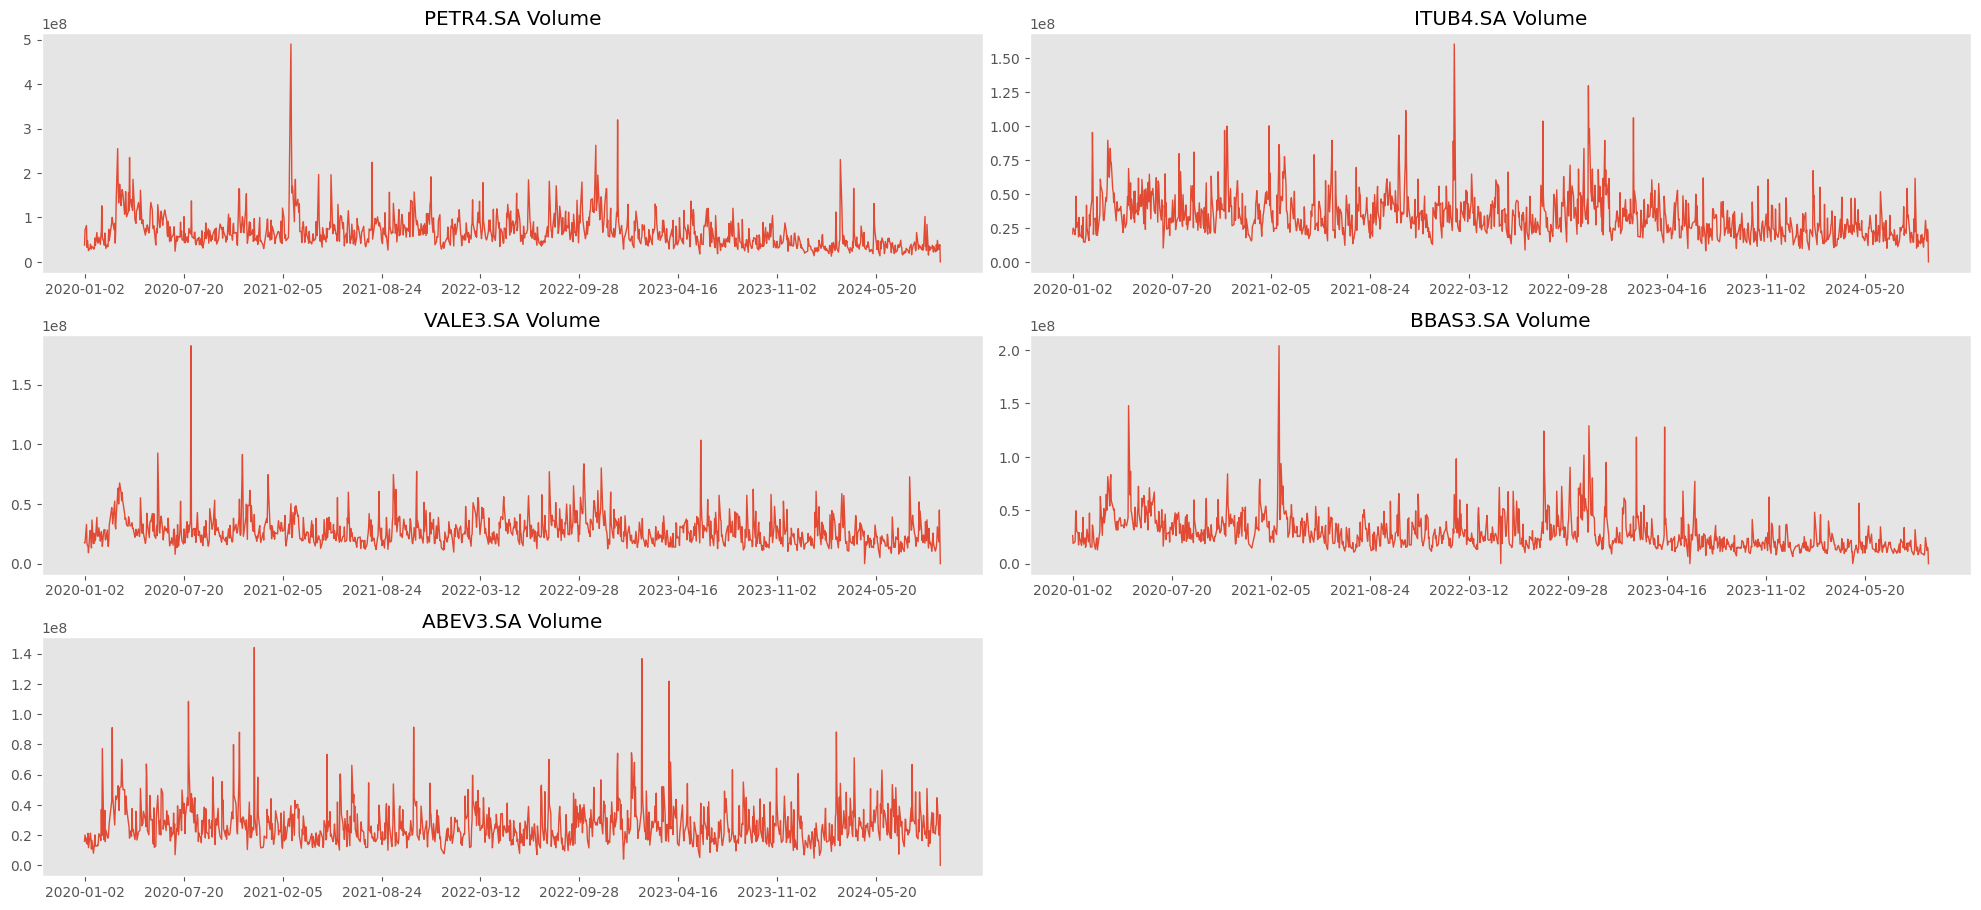

In [ ]:
plt.figure(figsize = (20, 15))
for i,stock in enumerate(tickers, 1):
    plt.subplot(5, 2, i)
    plt.plot(data['Date'], stock_volume(data, stock), linewidth = 1)
    plt.xticks(x_dates)
    plt.title(f'{stock} Volume')
    plt.grid()
plt.tight_layout()
plt.show()


Plotando diferentes números de dias de média móvel

Aqui são plotados os preços de fechamento das ações juntamente com médias móveis de 5, 10, 20 e 50 dias.

- `moving_average()`: Calcula as médias móveis para diferentes períodos.



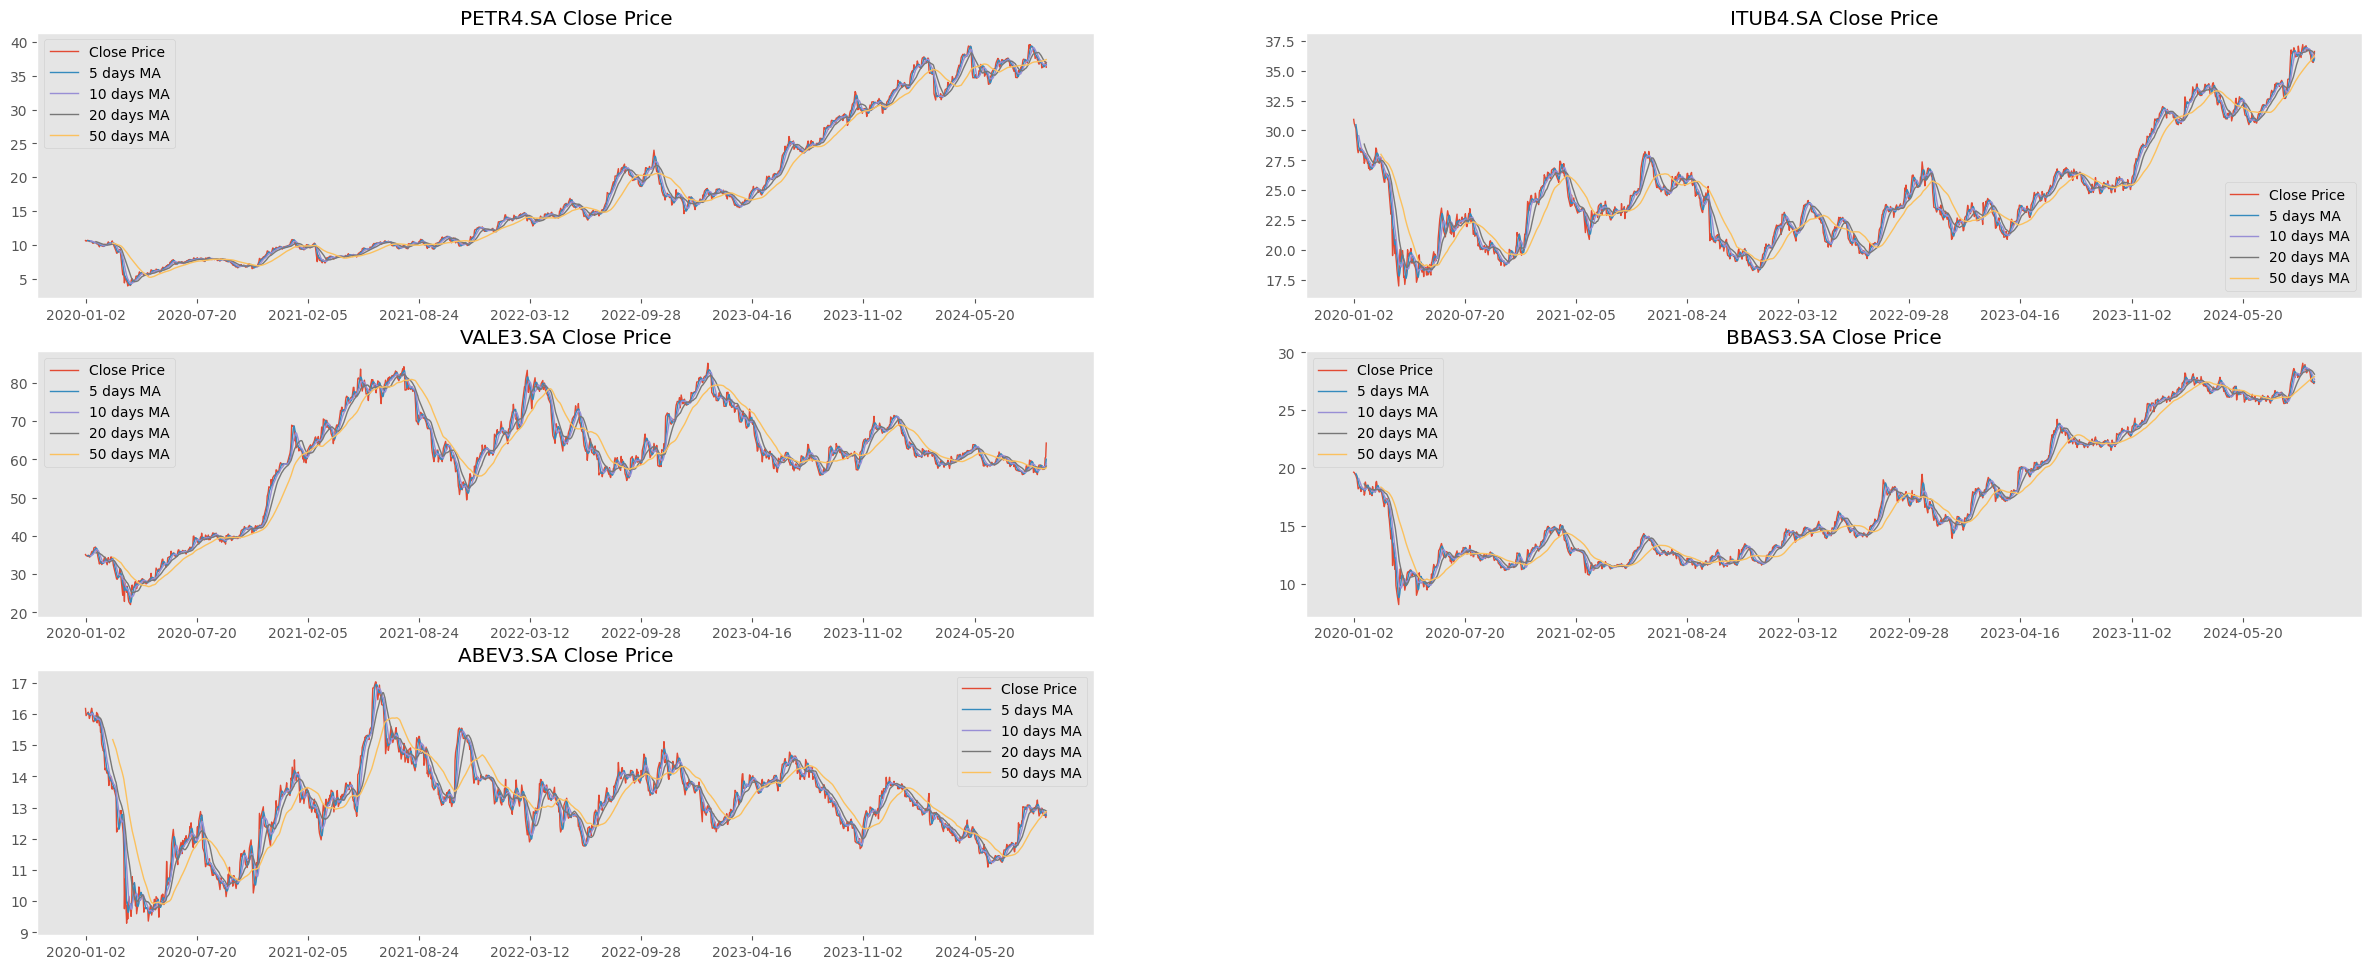

In [ ]:
plt.figure(figsize = (30, 20))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data['Date'], data[f'{stock}_close'], linewidth = 1, label = 'Close Price')
    for n_days in [5, 10, 20, 50]:
        plt.plot(data['Date'], moving_average(data, stock, n_days), label = f'{n_days} days MA', linewidth = 1)
    plt.xticks(x_dates)
    plt.title(f'{stock} Close Price')
    plt.legend()
    plt.grid()

Plotando o retorno total

Este bloco plota o retorno total acumulado para cada ativo.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

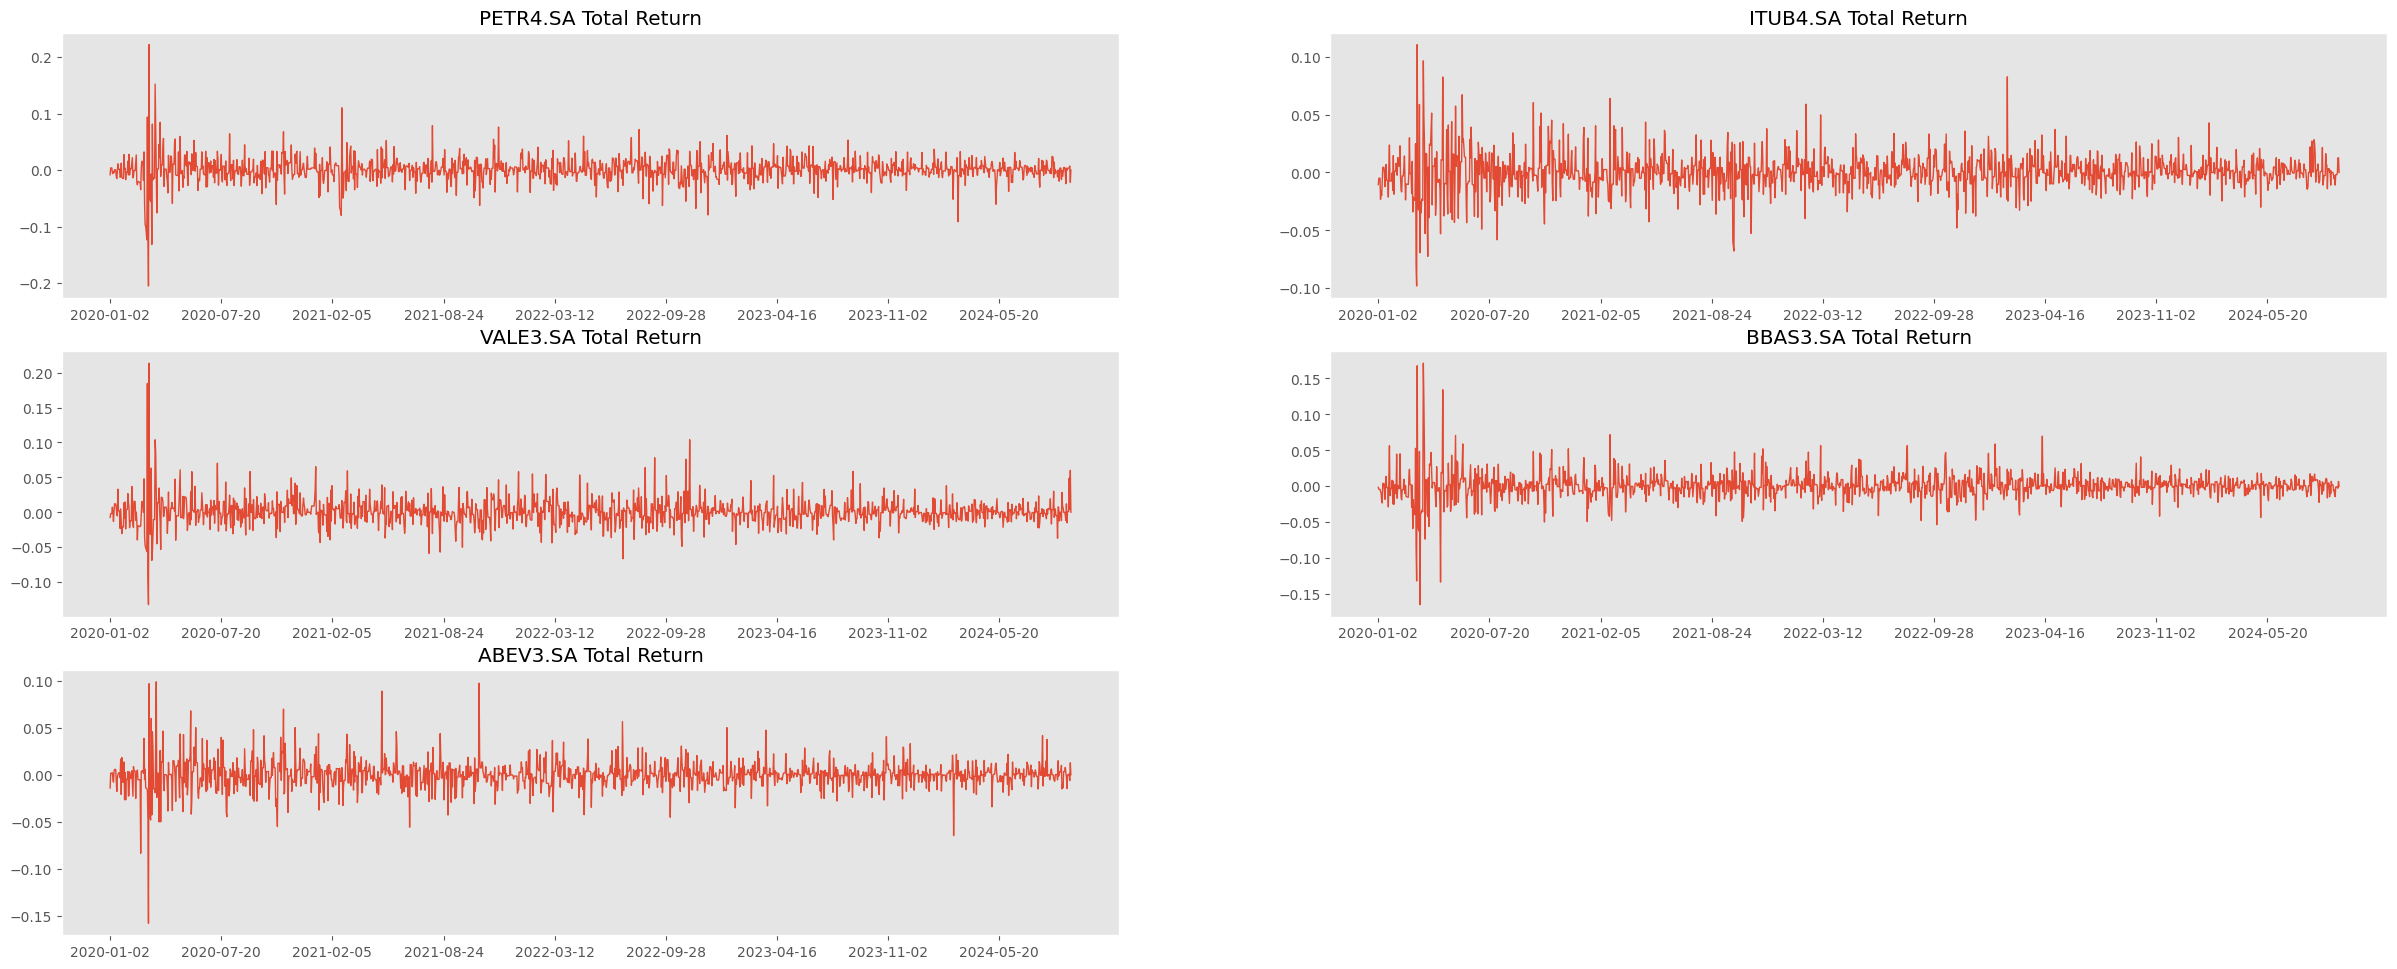

In [ ]:
plt.figure(figsize = (30, 20))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data_total_return['Date'], data_total_return[stock], linewidth = 1)
    plt.xticks(x_dates)
    plt.title(f'{stock} Total Return')
    plt.grid()
plt.tight_layout

Verificando possíveis tendências fazendo downsampling

Neste bloco, os dados são reamostrados para frequência mensal para identificar tendências de longo prazo.

- `pd.to_datetime()`: Converte a coluna de datas para o formato datetime.
- `resample()`: Faz o downsampling dos dados para frequência mensal.
- `plt.plot()`: Plota os preços de fechamento mensais.


/tmp/ipykernel_11078/3862046333.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


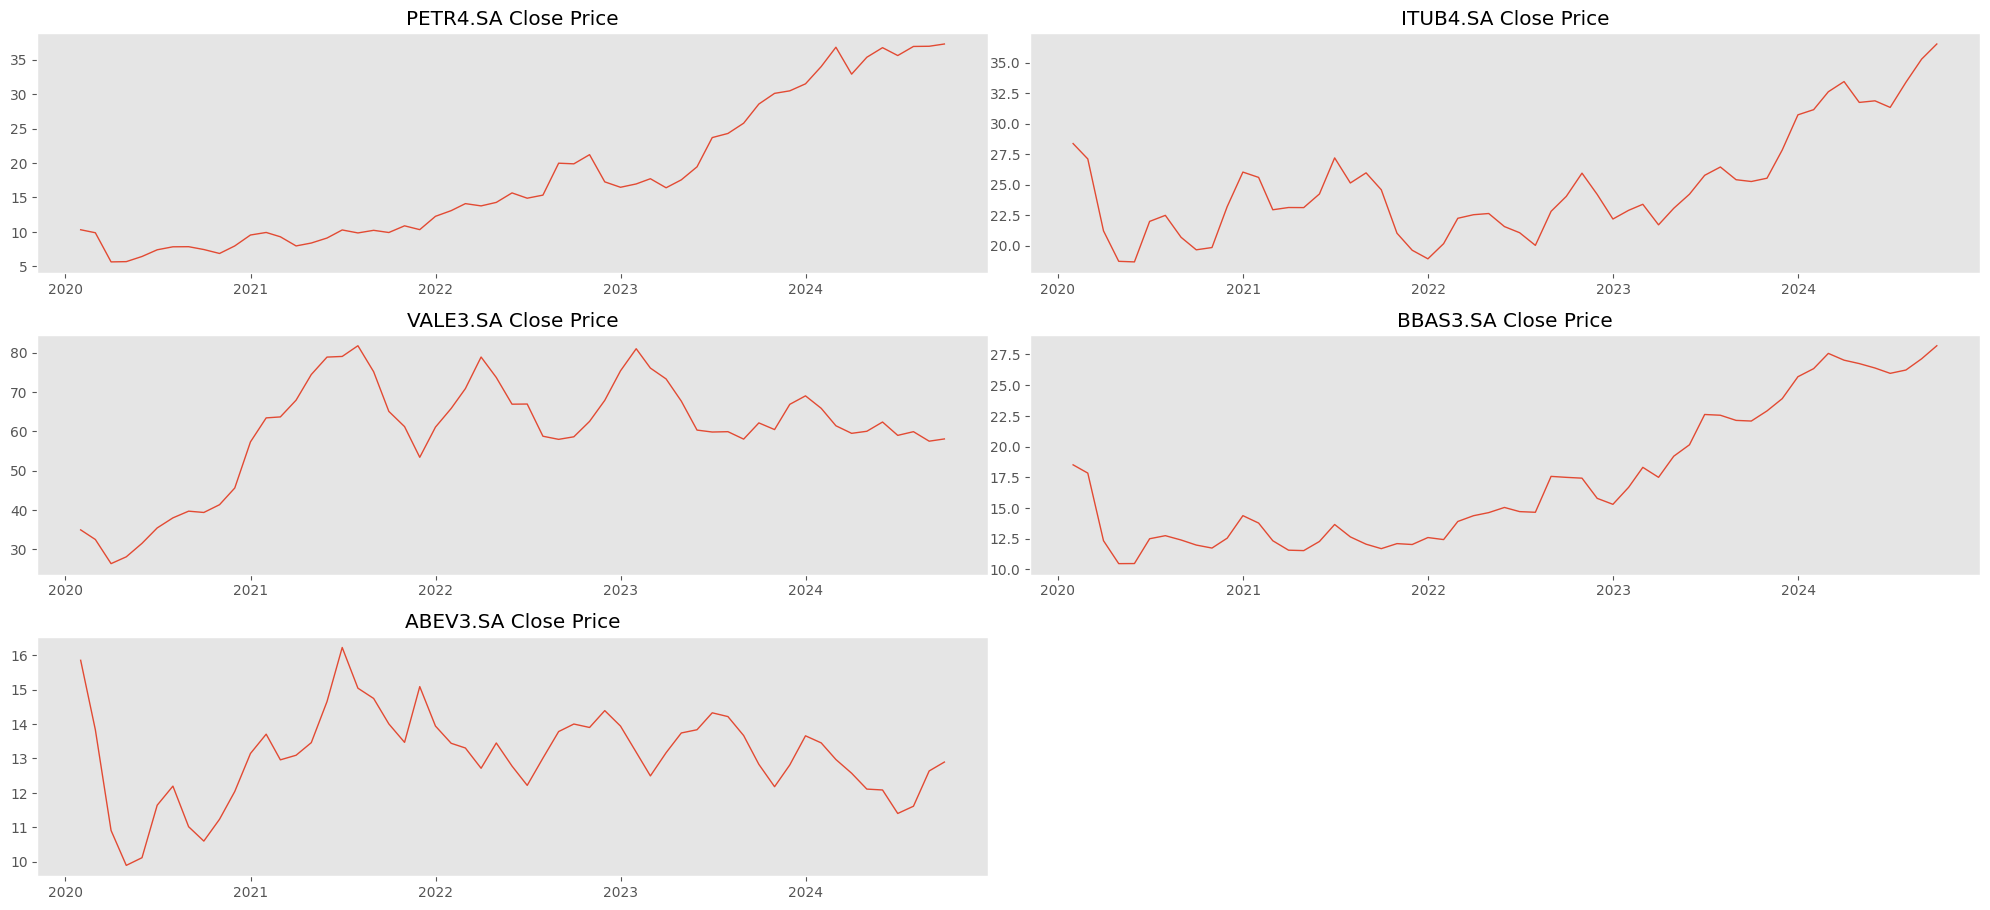

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace = True)

data_monthly = data.resample('M').mean()

plt.figure(figsize = (20, 15))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data_monthly.index, data_monthly[f'{stock}_close'], linewidth = 1)
    plt.title(f'{stock} Close Price')
    plt.grid()
plt.tight_layout()
plt.show()

Extraindo a sazonalidade das séries temporais

Este bloco utiliza `seasonal_decompose()` para decompor as séries temporais em componentes de tendência, sazonalidade e resíduo.

- `seasonal_decompose()`: Decompõe as séries temporais.
- `result.plot()`: Plota cada componente da decomposição.

<Figure size 3000x2000 with 0 Axes>

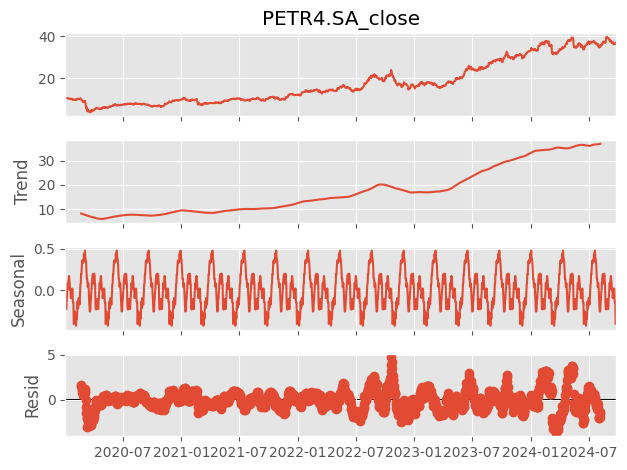

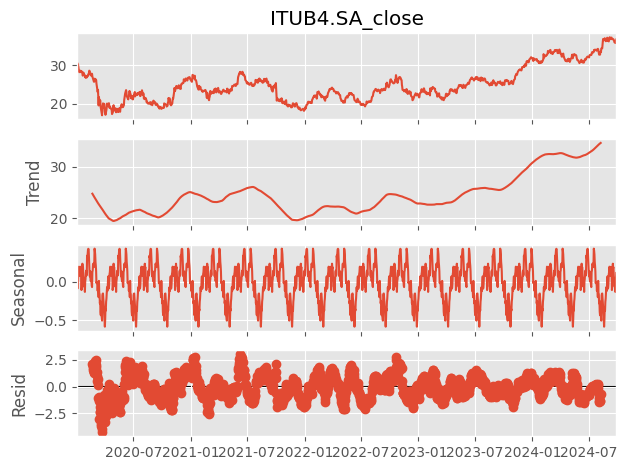

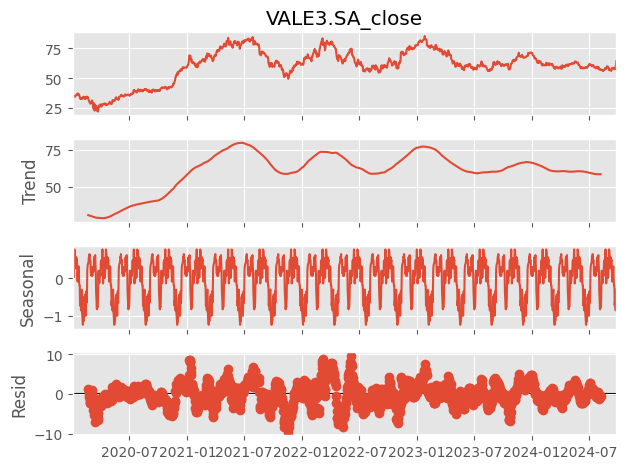

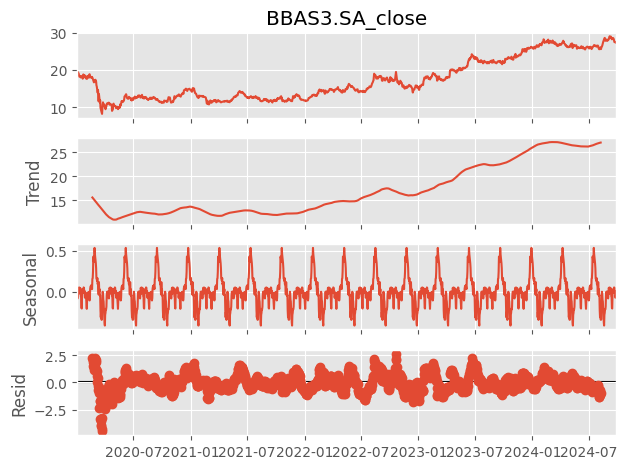

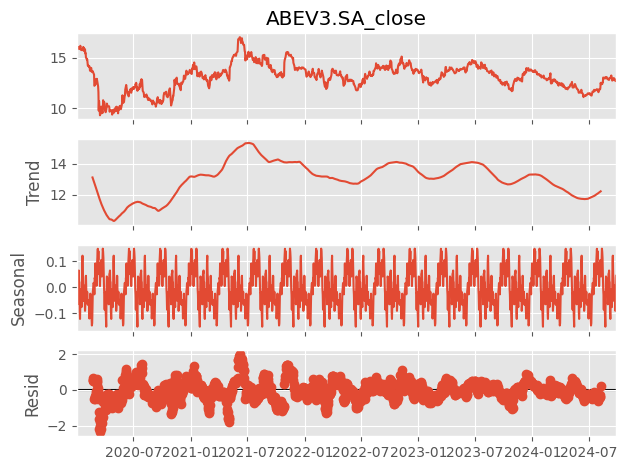

In [ ]:
plt.figure(figsize = (30, 20))
for i, stock in enumerate(tickers, 1):
    data[f'{stock}_close'] = data[f'{stock}_close'].astype(float)
    result = seasonal_decompose(data[f'{stock}_close'], model='additive', period=100)
    result.plot()

## Regressão Linear


Usando Sazonalidade, Tendência, Resíduo, e a Média Móvel para predizer o preço de fechamento

A função `prepare_data()` prepara os dados para modelagem.

- `seasonal_decompose()`: Decompõe os dados em tendência, sazonalidade e resíduo.
- `moving_average()`: Calcula a média móvel.
- `interpolate()` e `fillna()`: Lida com valores ausentes nos dados.


In [ ]:
def prepare_data(data, stock, n_days):
    data[f'{stock}_close'] = data[f'{stock}_close'].astype(float)

    decomposition = seasonal_decompose(data[f'{stock}_close'], model='additive', period=100)
    
    data[f'{stock}_close_trend'] = decomposition.trend
    data[f'{stock}_close_seasonal'] = decomposition.seasonal
    data[f'{stock}_close_resid'] = decomposition.resid
    
    data[f'{stock}_close_ma'] = moving_average(data, stock, n_days)
    
    data.interpolate(method='linear', inplace=True)
    data.fillna(method='ffill', inplace=True)
    data.fillna(method='bfill', inplace=True)
    
    return data

# data = prepare_data(data, 'PETR4.SA', 5)
# data.head(100)

$$
\begin{array}{ll}
Y_{t+h} & = & \beta_{00} & + \beta_{01} \cdot \text{Seasonality}_{t-h} & + \beta_{02} \cdot \text{Trend}_{t-h} & + \beta_{03} \cdot \text{Moving Average}_{t-h} & + \beta_{04} \cdot \text{Stock Split}_{t-h} & + \beta_{05} \cdot \text{Volume}_{t-h} \\
& = & \beta_{10} & + \beta_{11} \cdot \text{Seasonality}_{t-h-1} & + \beta_{12} \cdot \text{Trend}_{t-h-1} & + \beta_{13} \cdot \text{Moving Average}_{t-h-1} & + \beta_{14} \cdot \text{Stock Split}_{t-h-1} & + \beta_{15} \cdot \text{Volume}_{t-h-1} \\
& + & \vdots \\
& = & \beta_{k0} & + \beta_{k1} \cdot \text{Seasonality}_{t-h-k} & + \beta_{k2} \cdot \text{Trend}_{t-h-k} & + \beta_{k3} \cdot \text{Moving Average}_{t-h-k} & + \beta_{k4} \cdot \text{Stock Split}_{t-h-k} & + \beta_{k5} \cdot \text{Volume}_{t-h-k} \\
\end{array}
$$

Ou seja,

$$
Y_{t+h} = \beta_0 + \beta_1 X_{1_{t-h}} + \beta_2 X_{2_{t-h}} + \beta_3 X_{3_{t-h}} + \beta_4 X_{4_{t-h}} + \beta_5 X_{5_{t-h}} + ... + \beta_n X_{n_{t-h-k}}
$$


# Forward Feature Selection: Explicação e Implementação

A **Forward Feature Selection** é um método para selecionar o subconjunto de features (variáveis preditoras) que melhor explica a variável-alvo (y) em um modelo de regressão. Este processo é feito iterativamente, adicionando features ao modelo uma por vez e avaliando seu desempenho com base em métricas como R² e Erro Quadrático Médio (MSE).

---

## Passo a Passo da Função

### 1. **Preparação dos Dados**
As features são preparadas a partir de dados históricos do ativo (`stock`) e transformadas com lags (valores deslocados no tempo). Isso permite capturar padrões temporais. Exemplo de features:
- **trend**: tendência da série.
- **seasonal**: componente sazonal.
- **resid**: resíduos.
- **ma**: média móvel.
- **volume**: volume negociado.
- **stock splits**: divisão de ações.

Cada feature pode ser deslocada por `lag` períodos, gerando colunas como:
- `Trend_lag_1`
- `Resid_lag_3`
- `Ma_lag_5`

### 2. **Preenchimento de Valores Ausentes**
Após aplicar os lags, algumas linhas terão valores ausentes (NaN). Esses valores são preenchidos com a média da coluna.

### 3. **Definição da Variável-Alvo**
A variável-alvo `y` é definida como o preço de fechamento (`stock_close`) deslocado `h` períodos no futuro. O modelo tentará prever esses valores futuros.

### 4. **Divisão em Conjuntos de Treino e Teste**
Os dados são divididos de forma sequencial:
- **Treino**: 80% dos dados, para ajustar o modelo.
- **Teste**: 20% dos dados, para avaliar o desempenho do modelo.

### 5. **Escalonamento das Features**
As variáveis são escalonadas usando o `StandardScaler` para que todas fiquem na mesma escala, evitando que diferenças de magnitude influenciem o modelo.

### 6. **Iteração de Combinações de Features**
- Todas as combinações de features são testadas, desde combinações simples (tamanho 1) até combinações completas.
- Para cada conjunto de features, um modelo de regressão linear é ajustado e avaliado.

### 7. **Avaliação do Desempenho**
- **R²**: Mede a proporção da variância explicada pelo modelo.
- **MSE**: Mede o erro médio ao prever os valores de `y`.

A combinação de features que maximiza o R² (ou minimiza o MSE) no conjunto de teste é selecionada.

### 8. **Visualização das Previsões**
Após identificar o melhor conjunto de features, o modelo final é ajustado novamente, e suas previsões são comparadas aos valores reais em um gráfico.

---

## Retorno da Função

A função `forward_feature_selection` retorna:
1. **`best_features`**: Subconjunto de features que apresentou o melhor desempenho.
2. **`best_r2`**: Coeficiente R² do melhor modelo.
3. **`best_mse`**: Erro Quadrático Médio do melhor modelo.
4. **`results`**: Lista com todas as combinações testadas e suas métricas.
5. **`model`**: Modelo treinado com as melhores features.
6. **`scaler`**: Escalonador ajustado.
7. **`X_train`, `y_train`, `X_test`, `y_test`**: Conjuntos de treino e teste.

---

## Visualização do Fluxo de Trabalho

1. **Entrada**: Um DataFrame com colunas do ativo financeiro, como preço de fechamento, tendência e volume.
2. **Transformações**: Geração de lags, preenchimento de valores ausentes, divisão dos dados.
3. **Iteração**: Teste de combinações de features e ajuste do modelo.
4. **Saída**: Seleção das melhores features e visualização do desempenho.

---

In [ ]:
def forward_feature_selection(data, stock, h=5, max_lag=5, max_combinations=100000):
    data = prepare_data(data, stock, h)
    
    features = ['trend', 'seasonal', 'resid', 'ma', 'volume', 'stock splits']
    
    X = pd.DataFrame()
    feature_names = []
    if max_lag == 0:
        for feature in features:
            if feature in ['volume', 'stock splits']:
                X[feature.capitalize()] = data[f'{stock}_{feature}'].shift(h)
            else:
                X[feature.capitalize()] = data[f'{stock}_close_{feature}'].shift(h)
            feature_names.append(feature.capitalize())
    else:
        for lag in range(1, max_lag + 1):
            for feature in features:
                lagged_feature = f'{feature.capitalize()}_lag_{lag}'
                if feature in ['volume', 'stock splits']:
                    X[lagged_feature] = data[f'{stock}_{feature}'].shift(h + lag)
                else:
                    X[lagged_feature] = data[f'{stock}_close_{feature}'].shift(h + lag)
                feature_names.append(lagged_feature)

    X = X.fillna(X.mean())

    y = data[f'{stock}_close'].shift(-h)

    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_features = []
    best_r2 = -float('inf')
    best_mse = float('inf')
    results = []
    combination_count = 0

    for size in range(1, len(feature_names) + 1):
        for subset in combinations(feature_names, size):
            combination_count += 1
            if combination_count > max_combinations:
                print(f"Máximo de {max_combinations} combinações atingido.")
                break

            X_train_subset = X_train_scaled[:, [feature_names.index(f) for f in subset]]
            X_test_subset = X_test_scaled[:, [feature_names.index(f) for f in subset]]

            model = LinearRegression()
            model.fit(X_train_subset, y_train)

            y_pred = model.predict(X_test_subset)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)

            results.append((subset, r2, mse))

            if r2 > best_r2:
                best_r2 = r2
                best_mse = mse
                best_features = subset

        if combination_count > max_combinations:
            break

    best_indices = [feature_names.index(f) for f in best_features]
    X_test_best = X_test_scaled[:, best_indices]
    model = LinearRegression()
    model.fit(X_train_scaled[:, best_indices], y_train)
    y_pred_best = model.predict(X_test_best)

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label='Preço Real', linewidth=1)
    plt.plot(y_test.index, y_pred_best, label='Preço Previsto (Melhor Modelo)', linewidth=1, linestyle='--')
    plt.title(f'Forward Feature Selection para {stock}')
    plt.legend()
    plt.show()

    return best_features, best_r2, best_mse, results, model, scaler, X_train, y_train, X_test, y_test


In [ ]:
# def linear_regression(data, stock, h=5, max_lag=5):
#     prepare_data(data, stock, h)
    
#     X = pd.DataFrame()
#     if max_lag == 0:
#         X['Seasonality'] = data[f'{stock}_close_seasonal'].shift(h)
#         X['Trend'] = data[f'{stock}_close_trend'].shift(h)
#         X['Moving_Average'] = data[f'{stock}_close_ma'].shift(h)
#         X['Stock_Splits'] = data[f'{stock}_stock splits'].shift(h)
#         X['Residue'] = data[f'{stock}_close_resid'].shift(h)
#         X['Volume'] = data[f'{stock}_volume'].shift(h)
#     else:
#         for lag in range(1, max_lag+1):
#             X[f'Seasonality_lag_{lag}'] = data[f'{stock}_close_seasonal'].shift(h+lag)
#             X[f'Trend_lag_{lag}'] = data[f'{stock}_close_trend'].shift(h+lag)
#             X[f'Moving_Average_lag_{lag}'] = data[f'{stock}_close_ma'].shift(h+lag)
#             X[f'Stock_Splits_lag_{lag}'] = data[f'{stock}_stock splits'].shift(h+lag)
#             X[f'Volume_lag_{lag}'] = data[f'{stock}_volume'].shift(h+lag)
#             X[f'Residue_lag_{lag}'] = data[f'{stock}_close_resid'].shift(h+lag)

#     X = X.fillna(X.mean())

#     y = data[f'{stock}_close'].shift(-h)

#     valid_indices = y.dropna().index
#     X = X.loc[valid_indices]
#     y = y.loc[valid_indices]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     model = LinearRegression()
#     model.fit(X_train_scaled, y_train)

#     y_pred = model.predict(X_test_scaled)

#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)  # Cálculo do R2

#     plt.figure(figsize=(10, 5))
#     plt.plot(y_test.index, y_test, label='Preço Real', linewidth=1)
#     plt.plot(y_test.index, y_pred, label='Preço Previsto', linewidth=1, linestyle='--')
#     plt.title(f'Previsão de Preço para {stock} (Teste)')
#     plt.legend()
#     plt.show()

#     return model, scaler, mse, r2, X_train, y_train, X_test, y_test


/tmp/ipykernel_11078/2302502017.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_11078/2302502017.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


Máximo de 200000 combinações atingido.


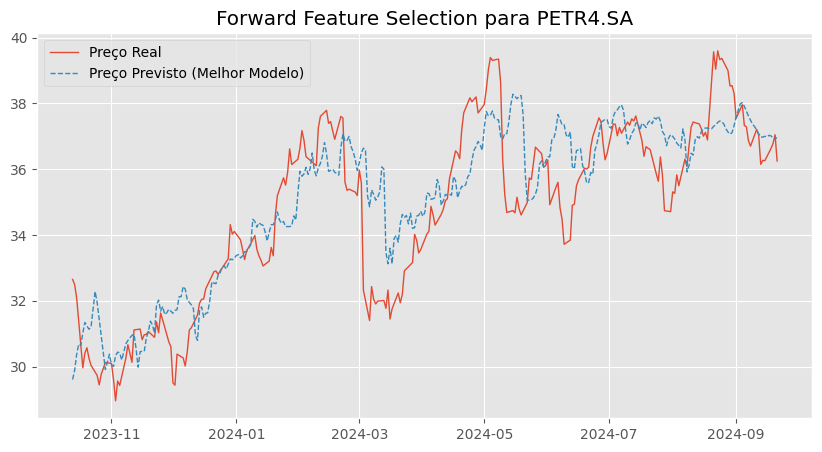

As melhores features são : ('Trend_lag_1', 'Resid_lag_1', 'Ma_lag_1', 'Seasonal_lag_3', 'Resid_lag_3', 'Ma_lag_5') 

{'O Erro Quadrático Médio (MSE) é: 2.0512890406728586 e o coeficiente R2 é: 0.7099445113465606'}


In [ ]:
best_features, best_r2, best_mse, results, model, scaler, X_train, y_train, X_test, y_test  = forward_feature_selection(data, 'PETR4.SA', h=5, max_lag=5, max_combinations = 200000)
print(f"As melhores features são : {best_features} \n")
print({f"O Erro Quadrático Médio (MSE) é: {best_mse} e o coeficiente R2 é: {best_r2}"})

# Análise de Overfitting com Visualização de Resultados

A função `plot_overfitting_analysis` realiza uma análise de overfitting comparando o desempenho do modelo nos conjuntos de treino e teste. Ela avalia métricas como Erro Quadrático Médio (MSE) e cria gráficos para visualizar a qualidade das previsões.

---

## Passo a Passo da Função

### 1. Garantir Consistência nas Features
- O parâmetro `best_features` pode ser passado como uma lista ou tupla.
- A função verifica se todas as features em `best_features` estão presentes no conjunto de treino (`X_train`).
- Caso alguma feature esteja ausente, uma mensagem de alerta será exibida.

### 2. Selecionar as Features Específicas
- Apenas as features listadas em `best_features` e disponíveis no conjunto de dados são utilizadas para análise.
- Subconjuntos `X_train_best` e `X_test_best` são criados contendo somente essas features.

### 3. Escalonamento das Features
- As features selecionadas são escalonadas utilizando o `StandardScaler` para garantir consistência no treinamento e teste.
- Um novo `StandardScaler` (`scaler_best`) é ajustado para as features de treino e aplicado às de teste.

### 4. Previsões nos Conjuntos de Treino e Teste
- O modelo realiza previsões nos conjuntos escalonados (`X_train_best_scaled` e `X_test_best_scaled`).
- As previsões são comparadas aos valores reais para calcular o **Erro Quadrático Médio (MSE)**.

### 5. Comparação Visual do MSE
- Um gráfico de barras compara o MSE nos conjuntos de treino e teste, evidenciando possíveis casos de overfitting ou underfitting.

### 6. Visualização das Previsões
- Dois gráficos de linhas são gerados:
  - Um para o conjunto de treino, comparando os valores reais e previstos.
  - Outro para o conjunto de teste, também comparando os valores reais e previstos.

---


In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_overfitting_analysis(best_features, model, scaler, X_train, y_train, X_test, y_test):
    if isinstance(best_features, tuple):
        best_features = list(best_features)
    
    available_features = [f for f in best_features if f in X_train.columns]
    if len(available_features) != len(best_features):
        print(f"Algumas features em best_features não estão disponíveis em X_train: {set(best_features) - set(available_features)}")

    X_train_best = X_train[available_features]
    X_test_best = X_test[available_features]
    
    scaler_best = StandardScaler()
    X_train_best_scaled = scaler_best.fit_transform(X_train_best)
    X_test_best_scaled = scaler_best.transform(X_test_best)
    
    y_train_pred = model.predict(X_train_best_scaled)
    y_test_pred = model.predict(X_test_best_scaled)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"MSE no treino: {mse_train}")
    print(f"MSE no teste: {mse_test}")

    plt.figure(figsize=(8, 5))
    plt.bar(['Treino', 'Teste'], [mse_train, mse_test], color=['blue', 'orange'])
    plt.title('Comparação de MSE: Treino vs Teste')
    plt.ylabel('MSE')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Preço Real (Treino)', color='blue', linewidth=1)
    plt.plot(y_train.index, y_train_pred, label='Preço Previsto (Treino)', color='orange', linestyle='--', linewidth=1)
    plt.title('Previsão de Preço no Conjunto de Treino')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Preço Real (Teste)', color='blue', linewidth=1)
    plt.plot(y_test.index, y_test_pred, label='Preço Previsto (Teste)', color='orange', linestyle='--', linewidth=1)
    plt.title('Previsão de Preço no Conjunto de Teste')
    plt.legend()
    plt.show()


MSE no treino: 0.9812106950837832
MSE no teste: 2.0512890406728586


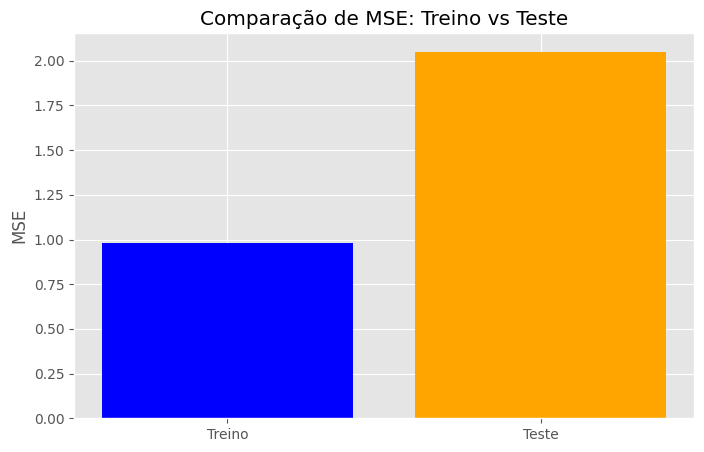

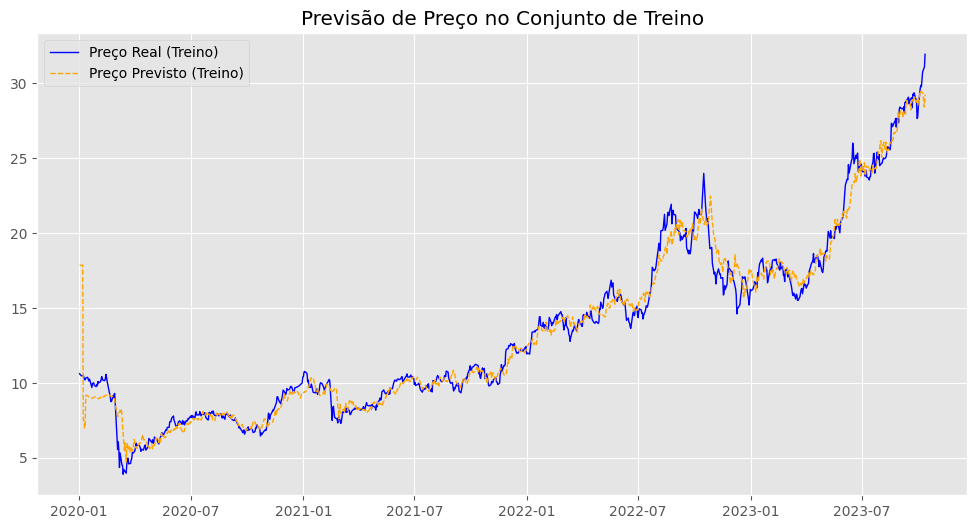

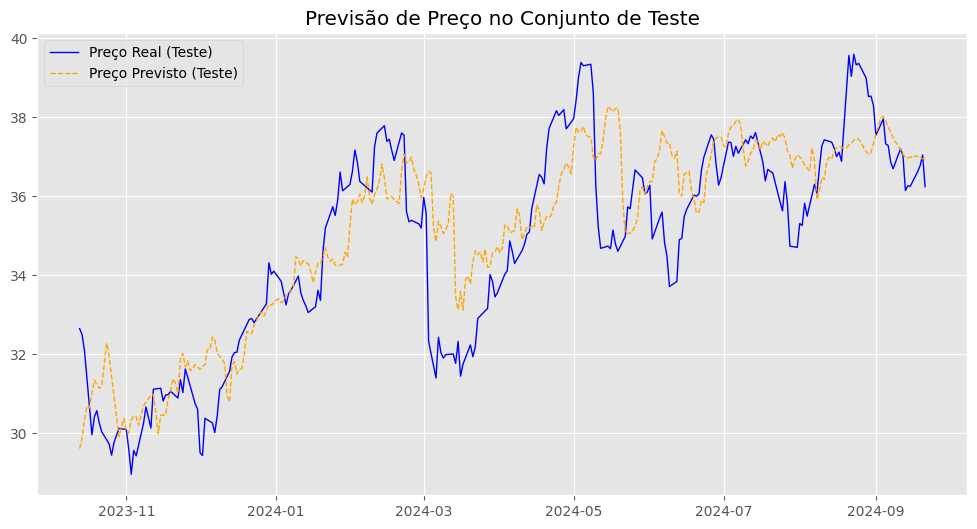

In [ ]:
plot_overfitting_analysis(best_features, model, scaler, X_train, y_train, X_test, y_test)

# Previsão de Valores Futuros com Features Selecionadas

A função `predict_next_days` realiza previsões de valores futuros utilizando um modelo de regressão previamente treinado. Ela utiliza apenas as features selecionadas (`best_features`) para gerar previsões de curto prazo, considerando janelas temporais (lags).

---

## Passo a Passo da Função

### 1. Garantir Consistência nas Features
- O parâmetro `best_features` pode ser passado como uma lista ou tupla.
- A função converte para lista, se necessário, e verifica se as features estão presentes nos dados fornecidos (`data`).

### 2. Construção das Features Finais
- Para cada feature em `best_features`, a função identifica o nome base (`base_feature`) e o lag correspondente, caso exista.
- As features são mapeadas para as colunas do DataFrame `data`:
  - Exemplo: `Trend_lag_3` será mapeada para `{stock}_close_trend` com um deslocamento de 3 períodos.

### 3. Verificação de Disponibilidade das Features
- Apenas as features disponíveis são utilizadas.
- Caso alguma feature esteja ausente no DataFrame, uma mensagem de alerta é exibida.

### 4. Preenchimento de Valores Ausentes
- Qualquer valor ausente nas features (gerado por deslocamentos temporais) é preenchido pela média da coluna correspondente.

### 5. Seleção dos Dados Finais
- Apenas as últimas `h` linhas completas das features selecionadas são utilizadas para previsão.

### 6. Escalonamento das Features
- As features selecionadas são escalonadas utilizando um novo `StandardScaler`.

### 7. Geração de Previsões
- O modelo utiliza os dados escalonados para prever os valores futuros.
- As previsões são associadas a datas futuras, com base na última data disponível no DataFrame original.

### 8. Visualização dos Resultados
- Um gráfico de linha exibe as previsões para os próximos `h` dias.

---

In [ ]:
from sklearn.preprocessing import StandardScaler

def predict_next_days(model, scaler, data, stock, best_features, h=5, max_lag=5):
    if isinstance(best_features, tuple):
        best_features = list(best_features)
    
    X_future = pd.DataFrame()

    for feature in best_features:
        if '_lag_' in feature:
            base_feature, lag = feature.split('_lag_')
            lag = int(lag)
        else:
            base_feature, lag = feature, None

        column_name = None
        if base_feature == 'Trend':
            column_name = f'{stock}_close_trend'
        elif base_feature == 'Seasonal':
            column_name = f'{stock}_close_seasonal'
        elif base_feature == 'Resid':
            column_name = f'{stock}_close_resid'
        elif base_feature == 'Ma':
            column_name = f'{stock}_close_ma'
        elif base_feature == 'Volume':
            column_name = f'{stock}_volume'
        elif base_feature == 'Stock splits':
            column_name = f'{stock}_stock splits'

        if column_name and column_name in data.columns:
            if lag:
                X_future[feature] = data[column_name].shift(h + lag)
            else:
                X_future[feature] = data[column_name].shift(h)

    available_features = [f for f in best_features if f in X_future.columns]
    if len(available_features) != len(best_features):
        print(f"Algumas features em best_features não estão disponíveis em X_future: {set(best_features) - set(available_features)}")
    
    X_future = X_future[available_features]

    X_future = X_future.fillna(X_future.mean())

    X_future_final = X_future.iloc[-h:, :]

    scaler_best = StandardScaler()
    X_future_scaled = scaler_best.fit_transform(X_future_final)

    future_predictions = model.predict(X_future_scaled)

    last_date = data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, h + 1)]

    predictions_df = pd.DataFrame({'Data': future_dates, 'Previsão': future_predictions})
    print(predictions_df)

    plt.figure(figsize=(10, 5))
    plt.plot(future_dates, future_predictions, label=f'Previsão para os próximos {h} dias', linestyle='--', marker='o')
    plt.title(f'Previsão de Preço para {stock} após {h} dias')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.grid(True)
    plt.show()

    return predictions_df


        Data   Previsão
0 2024-09-27  12.456651
1 2024-09-28  15.263266
2 2024-09-29  15.159012
3 2024-09-30  13.569773
4 2024-10-01  10.953856


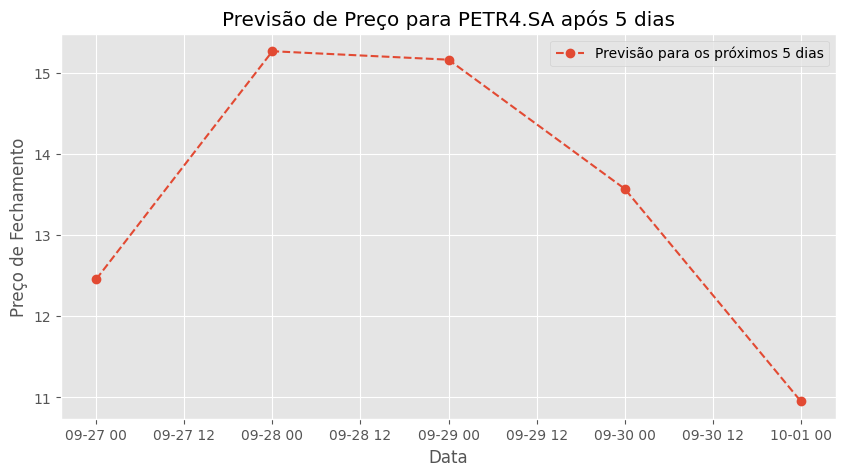

In [ ]:
future_predictions = predict_next_days(model, scaler, data, 'PETR4.SA', best_features, h=5)